# OBJETIVO

O objetivo é comparar diferentes modelos de machine learning (Regressão Logística, Árvore de Decisão e Random Forest) para a detecção de fraudes em transações de cartão de crédito. A análise busca identificar o melhor modelo para detectar fraudes com alta precisão, minimizando tanto os falsos positivos quanto os falsos negativos, e capturando a maior quantidade de fraudes possível.

# BIBLIOTECAS UTILIZADAS

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# BASE DE DADOS

In [317]:
df = pd.read_csv('creditcard.csv')
#fonte: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

#visualizando base de dados
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Time: tempo da transação em segundos desde a primeira transação.

V1 a V28: são variáveis numéricas geradas pela transformação PCA para anonimizar os dados originais.

Class: variável alvo, onde 1 representa uma transação fraudulenta e 0 uma transação legítima.

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Aparentemente, a base de dados não possui valores nulos. Vamos verificar isso, filtrando a quantidade de valores nulos para cada coluna.

In [321]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Desta forma, confirmamos que não existem valores nulos no dataset.

Agora, vamos fazer uma análise das estatísticas descritivas para tentar entender a distribuição das variáveis.

In [366]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Essa análise descritiva será interessante para comparação após a padronização das variáveis, onde podemos comparar o resultado com as informações originais.

# ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
Vamos verificar a distribuição das classes, onde:
transação legítima - 0
transação fraudulenta - 1

In [368]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Podemos observar que a classe está bastante desbalanceada, com muito mais transações não fraudulentas do que fraudulentas (o que é coerente com a realidade). Esta análise será importante quando discutirmos o percentual da acurácia em cada um dos modelos.

Como a variável 'Class' já está em uma forma discreta e binária (0 e 1), não há necessidade de normalizá-la.

# TRATAMENTO DOS DADOS

Vamos padronizar as variáveis 'Amount' e 'Time' para evitar problemas de escala.

In [370]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']].values)
df['Time'] = scaler.fit_transform(df[['Time']].values)

#visualizando o resultado
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Agora, vamos verificar a média e desvio padrão das colunas padronizadas.

In [372]:
#Amount
print("Média de 'Amount':", df['Amount'].mean())
print("Desvio padrão de 'Amount':", df['Amount'].std())

Média de 'Amount': 2.913951958230651e-17
Desvio padrão de 'Amount': 1.0000017555792826


In [374]:
#Time
print("Média de 'Time':", df['Time'].mean())
print("Desvio padrão de 'Time':", df['Time'].std())

Média de 'Time': -3.065637128659096e-16
Desvio padrão de 'Time': 1.0000017555794558


Como, para as duas variáveis, temos média próxima de 0 e desvio padrão próximo de 1, verificamos que padronização foi executada com sucesso.

# REGRESSÃO LOGÍSTICA

Primeiramente, aplicaremos uma regressão logística, que é um modelo comum em problemas de classificação binária.

In [376]:
#separando as variáveis preditoras (X) e a variável alvo (y)
X = df.drop('Class', axis=1)
y = df['Class']

In [378]:
#dividindo o dataset em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [380]:
#aplicando a Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [382]:
#fazendo previsões
y_pred = model.predict(X_test)

In [384]:
#avaliando o modelo
print("Relatório de classificação - Regressão linear:")
print(classification_report(y_test, y_pred))

Relatório de classificação - Regressão linear:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.87      0.64      0.74       136

    accuracy                           1.00     85443
   macro avg       0.93      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443



Precisão é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Para a classe fraudulenta (classe 1), a precisão é 0.87, o que significa que 87% das transações identificadas como fraudes realmente são fraudes.

O Recall mede a proporção de fraudes corretamente identificadas em relação ao total de fraudes reais. Para a classe fraudulenta (classe 1), o recall é 0.64, o que significa que o modelo está identificando 64% das fraudes.

O F1-score é a média harmônica entre precisão e recall, equilibrando as duas métricas. Neste caso, o F1-score para fraudes é 0.74, o que é um bom indicador geral do desempenho para a classe minoritária.

In [386]:
print("Acurácia do modelo - Regressão Logística:")
print(accuracy_score(y_test, y_pred))

Acurácia do modelo - Regressão Logística:
0.9992743700478681


Acurácia mede a proporção de previsões corretas em relação ao total de previsões. Neste caso, você tem uma acurácia de 99.992%, o que parece impressionante à primeira vista. No entanto, em problemas com classes desbalanceadas, como fraudes, a acurácia pode ser enganosa.

Para visualizar melhor o desempenho do modelo, vamos observar a matriz de confusão.

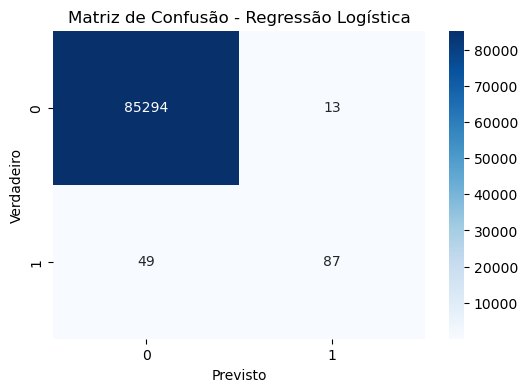

In [388]:
#Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Os elementos da matriz representam:

- Previsto 0, Verdadeiro 0: Transações legítimas previstas corretamente como legítimas.

- Previsto 1, Verdadeiro 1: Transações fraudulentas previstas corretamente como fraudulentas.

- Previsto 0, Verdadeiro 1: Fraudes que o modelo previu incorretamente como transações legítimas (falsos negativos).

- Previsto 1, Verdadeiro 0: Transações legítimas que o modelo previu incorretamente como fraudulentas (falsos positivos).

Interpretação dos Valores: 

O modelo previu 87 transações fraudulentas corretamente.
Isso indica que o modelo está capturando fraudes, mas a quantidade de fraudes capturadas poderia ser melhor (considerando que ainda existem 49 falsos negativos).

O modelo previu 85294 transações legítimas corretamente.
Isso mostra que o modelo tem um desempenho muito bom em prever corretamente as transações não fraudulentas, o que é esperado, pois a maioria das transações no dataset são legítimas.

O modelo previu 13 transações legítimas como sendo fraudulentas.
Esses falsos positivos são transações que não são fraudes, mas foram marcadas erroneamente como tais. Em um cenário de negócios, isso pode causar problemas para clientes legítimos, como bloqueio de transações.

O modelo classificou 49 fraudes como transações legítimas. Esses falsos negativos são problemáticos porque representam fraudes que o modelo não conseguiu capturar.

# ÁRVORE DE DECISÃO

A Árvore de Decisão pode capturar relações não lineares entre as variáveis, o que pode ser útil em casos de fraude que não seguem padrões simples. Podemos comparar a performance deste modelo com o da Regressão Logística para ver qual se sai melhor.

In [433]:
#treinando o modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [435]:
#fazendo previsões no conjunto de teste
y_pred_tree = tree_model.predict(X_test)

In [437]:
#avaliando o modelo
print("Relatório de classificação - Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))

Relatório de classificação - Árvore de Decisão:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.70      0.75      0.72       136

    accuracy                           1.00     85443
   macro avg       0.85      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



A precisão é 0.70, o que significa que 70% das transações previstas como fraudulentas realmente eram fraudes. Isso é um pouco mais baixo do que no modelo de regressão logística, onde a precisão era 0.87.

O recall é 0.75, o que significa que o modelo conseguiu identificar 75% das fraudes reais. Isso é melhor do que o recall de 0.64 na regressão logística, o que significa que o modelo de árvore de decisão está capturando uma maior proporção de fraudes.

O F1-score para a classe de fraudes é 0.72, o que é um equilíbrio razoável entre precisão e recall. Isso é levemente melhor do que o F1-score do modelo de regressão logística (que foi de 0.74).

In [439]:
print("Acurácia do modelo - Árvore de Decisão:")
print(accuracy_score(y_test, y_pred_tree))

Acurácia do modelo - Árvore de Decisão:
0.9990871107053826


Assim como no caso da regressão logística, a acurácia pode ser enganosa em um problema desbalanceado como a detecção de fraudes. A maioria das transações são legítimas, então o modelo pode parecer muito preciso simplesmente por classificar corretamente as transações não fraudulentas.

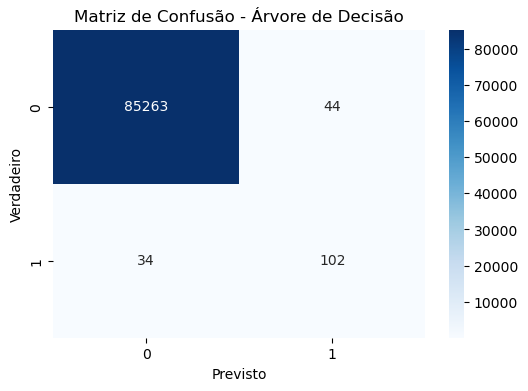

In [441]:
#Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Interpretação dos Valores:

O modelo previu 102 transações fraudulentas corretamente.
Esse valor é maior do que o observado na matriz da Regressão Logística (que tinha 87 verdadeiros positivos), indicando que a Árvore de Decisão está identificando mais fraudes.

O modelo previu 85263 transações legítimas corretamente, o que é um ótimo desempenho, semelhante ao da Regressão Logística.
A quantidade de verdadeiros negativos é muito alta, como esperado em problemas de fraude, onde a maioria das transações são legítimas.

O modelo previu 44 transações legítimas como fraudulentas, ou seja, marcou 44 transações legítimas incorretamente como fraudes.
Esse valor é mais alto do que o da Regressão Logística (que teve apenas 13 falsos positivos). Isso significa que a Árvore de Decisão está gerando mais falsos positivos, o que pode ser um inconveniente para clientes legítimos.

O modelo deixou de identificar 34 fraudes, prevendo-as incorretamente como transações legítimas.
Esse valor é menor do que na Regressão Logística, onde 49 fraudes não foram detectadas, o que significa que a Árvore de Decisão está capturando mais fraudes.

A Árvore de Decisão está identificando mais fraudes do que a Regressão Logística, com menos falsos negativos, o que significa que o modelo está capturando mais fraudes. No entanto, ele está gerando mais falsos positivos, o que pode ser problemático se transações legítimas forem bloqueadas ou se houver um custo alto associado a classificar transações legítimas como fraudulentas.

Se a prioridade for maximizar a detecção de fraudes (mesmo que isso signifique mais falsos positivos), a Árvore de Decisão pode ser uma escolha melhor. Caso o impacto dos falsos positivos seja alto, talvez seja necessário um ajuste no modelo.

# RANDOM FOREST

Por fim, aplicaremos o Random Forest, um modelo que combina várias Árvores de Decisão para aumentar a precisão e reduzir o risco de overfitting. Esse modelo é robusto e eficaz para lidar com dados complexos e desbalanceados, como é comum em problemas de detecção de fraudes.

In [443]:
#treinando o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [445]:
#fazendo previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

In [447]:
#avaliando o modelo
print("Relatório de classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

Relatório de classificação - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.80      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443



A precisão é 0.95, o que significa que 95% das transações previstas como fraudulentas realmente são fraudes. Isso é um valor muito alto e indica que o modelo está fazendo poucos falsos positivos (transações legítimas classificadas erroneamente como fraudes).

O recall é 0.80, o que significa que o modelo conseguiu identificar 80% das fraudes reais. Isso é uma melhora em relação ao modelo de Árvore de Decisão, que tinha um recall de 75%, e muito melhor que o modelo de Regressão Logística, que tinha um recall de 64%.

é 0.87, o que representa um ótimo equilíbrio entre precisão e recall. Este F1-score é o mais alto em comparação aos outros modelos (Árvore de Decisão e Regressão Logística).

In [449]:
print("Acurácia do modelo - Random Forest:")
print(accuracy_score(y_test, y_pred_rf))

Acurácia do modelo - Random Forest:
0.9996137776061234


A acurácia por si só não revela se o modelo está lidando bem com a classe minoritária (fraudes), portanto, é necessário complementar essa análise com a matriz de confusão, como fizemos ao longo da análise.

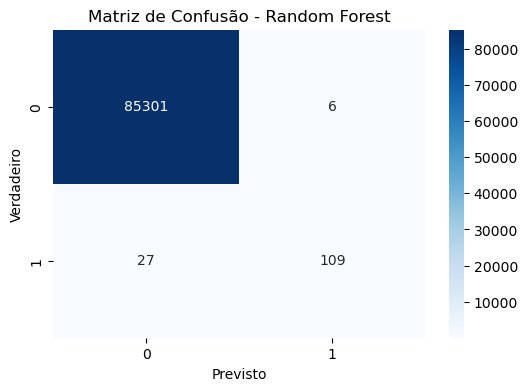

In [451]:
#Matriz de confusão
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()

Interpretação dos Valores:

O modelo identificou 109 transações fraudulentas corretamente, o que é uma melhoria em relação à Árvore de Decisão (102) e à Regressão Logística (87).

O modelo previu corretamente 85301 transações legítimas. Esse número é maior do que o da Árvore de Decisão (85263) e que a Regressão Logística (85294), mostrando que o Random Forest está um pouco melhor neste quesito.

O modelo marcou 6 transações legítimas como fraudulentas, muito menos do que a Árvore de Decisão (44) e a Regressão Logística (13), o que significa que ele faz muito menos previsões incorretas de transações legítimas como fraudes.

O modelo não conseguiu detectar 27 fraudes, prevendo-as como transações legítimas, o que é melhor do que a Árvore de Decisão (34) e a Regressão Logística (49), o que significa que o Random Forest está capturando mais fraudes.

# CONCLUSÃO

Ao longo da análise, avaliamos três diferentes modelos de machine learning para o problema de detecção de fraudes em transações de cartão de crédito: Regressão Logística, Árvore de Decisão, e Random Forest. Cada modelo foi analisado em termos de suas respectivas métricas de desempenho, incluindo a acurácia, precisão, recall, F1-score, e a interpretação de suas matrizes de confusão.

Com base na análise comparativa dos três modelos, o Random Forest foi claramente o modelo com o melhor desempenho, pois apresentou:

- A maior quantidade de fraudes detectadas.

- O menor número de falsos negativos, o que significa que capturou mais fraudes do que os outros modelos.

- O menor número de falsos positivos, garantindo que poucas transações legítimas fossem classificadas erroneamente como fraudes.